In [2]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.datasets import imdb
# tensorflow.keras.datasets 과 keras.datasets 은 거의 동일함. 5% 정도만 차이가 있음.
# tensorflow가 keras를 수용하고, 기반으로 프로그램 수행하기때문

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

num_words = 10000은 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미

In [11]:
# train_data, train_labels 의 0번 인덱스 값 확인
# 사전 인덱스가 있음. # 텍스트 데이터 자체면 토큰, 백터화 해줘야함.
print(train_data[0], '\n') # 길이 : 218개 
print(train_labels[0], '\n')

# train_data 의 shape 확인 & 관측치 확인
print(train_data.shape, '\n') #학습용 데이터 25000개
print(train_data[:5]) 
# 관측치 5개 -> 하나하나가 영화평, 토큰화된 인덱스 - 리스트로 25000개가 있음

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

1 

(25000,) 

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1

In [10]:
train_labels[0]
# = 1 (긍정) / 0 은 부정을 뜻함.

1

In [13]:
# 가장 자주 등장하는 단어 1만 개로 제한하면 단어 인덱스는 9,999개를 넘지않음.
import numpy as np
np.sort([max(sequence) for sequence in train_data])

array([ 394,  653,  824, ..., 9999, 9999, 9999])

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  # 2D tensor
  results = np.zeros((len(sequences), dimension))
  # 희소행렬
  for i, sequence in enumerate(sequences): 
    results[i, sequence] = 1. # 부동소수 / float
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [20]:
# X_train 벡터화 , 0 인덱스 확인
print(X_train[0])
# X_train 요소값의 길이 확인 = 10000
print(len(X_train[0]))

[0. 1. 1. ... 0. 0. 0.]
10000


In [21]:
# labels 벡터화
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
from tensorflow.keras import models
from tensorflow.keras import layers

# sequential class 이용하여 모델 생성
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # feature = 10000
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# 출력 Dense는 1인지 0인지 값이 1개만 나와야하기때문에 Dense 값으로 1을 부여

- 중간에 있는 은닉 층 = relu 활성화함수 \
: 음수를 0으로 만드는 함수
- 마지막 층 =  sigmoid 활성화함수(0과 1사이의 점수로, 확률에 대한 값 출력) \
: 임의의 값을 [0,1] 사이로 압축하므로 출력 값을 확률처럼 해석 가능.

In [44]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
# 원본 훈련 데이터에서 10,000개의 샘플로 검증 세트 생성
x_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5083 - accuracy: 0.7922 - val_loss: 0.3769 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2970 - accuracy: 0.9058 - val_loss: 0.3475 - val_accuracy: 0.8582
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2182 - accuracy: 0.9305 - val_loss: 0.2907 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1737 - accuracy: 0.9431 - val_loss: 0.3013 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1405 - accuracy: 0.9549 - val_loss: 0.3147 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1174 - accuracy: 0.9637 - val_loss: 0.3166 - val_accuracy: 0.8804
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.3080 - val_accuracy: 0.8857
Epoch 8/20
30/30 [=

In [47]:
# model.fit() 메서드는 History 객체를 반환.
# = 훈련동안 발생하는 모든 정보를 딕셔너리 형태로 담고있음.

history_dict = history.history
history_dict.keys()
# 측정 지표를 하나씩, 모두 4개의 항목을 가지고 있음.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

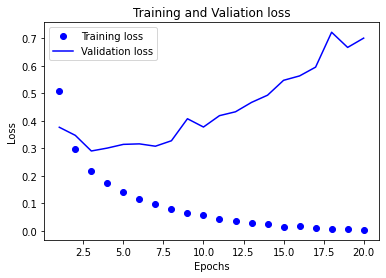

In [52]:
import matplotlib.pyplot as plt

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']
# val_acc : 학습용데이터
# val_loss : 검증용데이터

epochs = range(1, len(loss) + 1)

# 훈련과 검증데이터에 대한 손실 그래프
plt.plot(epochs, loss, 'bo', label = 'Training loss') # 'bo' = 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # 'b' = 파란색 실선
plt.title('Training and Valiation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 범레 출력

plt.show()

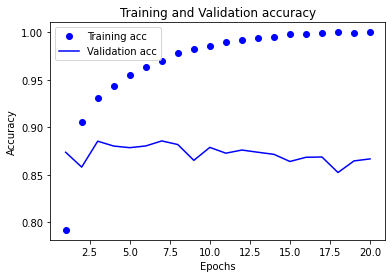

In [56]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 훈련과 검증데이터에 대한 정확도 그래프
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 훈련 손실이 epochs 마다 감소, 훈련 정확도는 epochs 마다 증가 \
경사 하강법 최적화를 사용했을 때, 반복마다 최소화되는 것 = 손실
- 두 번째 epochs부터 훈련 데이터에 과도하게 최적화되어 훈련데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화 되지 못함. = 과대적합 방지를 위해 세 번째 epochs 이후에 훈련을 중지할 수 있음.

In [50]:
# 모델을 처음부터 다시 학습하기
# 다시 새로운 신경망을 네 번의 epochs 동안만 훈련, 이후는 테스트 데이터에서 평가

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 5ms/step - loss: 0.4398 - accuracy: 0.8119
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.9125
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1933 - accuracy: 0.9312
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3037 - accuracy: 0.8798


In [51]:
results
# 87% 정확도(최고 수준의 기법을 사용시 95% 가까운 성능)

[0.3037327229976654, 0.879800021648407]